In [2]:
%pwd

'c:\\Users\\yashr\\OneDrive\\Desktop\\RetentiveGuard Model\\project\\RetentiveGuard\\research'

In [4]:
import os

os.chdir("..")

In [5]:
from pandas import read_csv


train_dataset = read_csv('artifacts/data_ingestion/data1/train_essays.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})

In [6]:
train_dataset

,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
1373,There has been a fuss about the Elector Colleg...,0
1374,Limiting car usage has many advantages. Such a...,0
1375,There's a new trend that has been developing f...,0
1376,As we all know cars are a big part of our soci...,0


In [7]:
curated_dataset = read_csv('artifacts/data_ingestion/data6/train_drcat_01.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset1 = read_csv('artifacts/data_ingestion/data6/train_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset2 = read_csv('artifacts/data_ingestion/data6/train_drcat_03.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset3 = read_csv('artifacts/data_ingestion/data6/train_drcat_04.csv')[['text', 'label']].reset_index(drop=True)

curated_dataset4 = read_csv('artifacts/data_ingestion/data3/machine-train.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset5 = read_csv('artifacts/data_ingestion/data3/machine-test.csv')[['text']].reset_index(drop=True).assign(label=1)

curated_dataset6 = read_csv('artifacts/data_ingestion/data2/ai_generated_train_essays.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset7 = read_csv('artifacts/data_ingestion/data2/ai_generated_train_essays_gpt-4.csv')[['text']].reset_index(drop=True).assign(label=1)

curated_dataset9 = read_csv('artifacts/data_ingestion/data4/daigt_external_dataset.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset10 = read_csv('artifacts/data_ingestion/data5/llama_70b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

curated_dataset11 = read_csv('artifacts/data_ingestion/data5/falcon_180b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

curated_dataset12 = read_csv('artifacts/data_ingestion/data7/train_v2_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset13 = read_csv('artifacts/data_ingestion/data8/persuade15_claude_instant1.csv')[['essay_text']].rename(columns={'essay_text' : 'text'}).reset_index(drop=True).assign(label=1)
curated_dataset14 = read_csv('artifacts/data_ingestion/data9/LLM_generated_essay_PaLM.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})
curated_dataset15 = read_csv('artifacts/data_ingestion/data10/train_essays_RDizzl3_seven_v2.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset16 = read_csv('artifacts/data_ingestion/data10/train_essays_RDizzl3_seven_v1.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset17 = read_csv('artifacts/data_ingestion/data10/train_essays_7_prompts_v2.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset18 = read_csv('artifacts/data_ingestion/data10/train_essays_7_prompts.csv')[['text', 'label']].reset_index(drop=True)


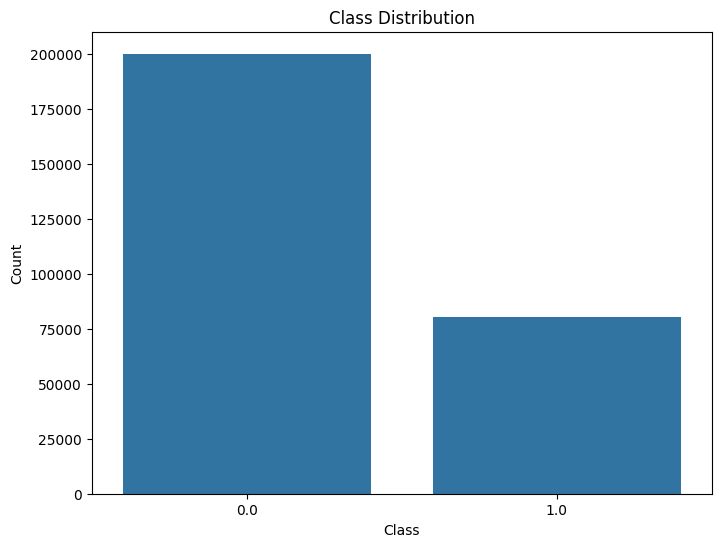

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import concat

train_dataset = concat([train_dataset, 
                        curated_dataset, 
                        curated_dataset1,
                        curated_dataset2,
                        curated_dataset3,
                        curated_dataset4, 
                        curated_dataset5, 
                        curated_dataset6, 
                        curated_dataset7, 
                        curated_dataset9, 
                        curated_dataset10, 
                        curated_dataset11,
                        curated_dataset12, 
                        curated_dataset13, 
                        curated_dataset14,
                        curated_dataset15,
                        curated_dataset16,
                        curated_dataset17, 
                        curated_dataset18])


plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_dataset)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [18]:
train_dataset.text = train_dataset.text.str.replace('\n', ' ')

In [19]:
train_dataset.head()

,text,label
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [20]:
train_dataset.label.value_counts()

label
0.0    200039
1.0     80432
Name: count, dtype: int64

In [21]:
from tensorflow.keras.layers import TextVectorization

tokenizer = TextVectorization(output_mode='int', output_sequence_length=512, standardize=None, ngrams=1)

In [ ]:
tokenizer.adapt(train_dataset.text)

In [23]:
VOCAB_SIZE = len(tokenizer.get_vocabulary())
VOCAB_SIZE

2

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer, LayerNormalization, GroupNormalization, Dense, SimpleRNNCell, RNN, LSTM, Bidirectional, LSTMCell
import torch
from itertools import repeat

import tensorflow as tf
from tensorflow.keras.layers import Layer, LayerNormalization, Dense, SimpleRNNCell, RNN, LSTM, Bidirectional, LSTMCell

class RecurrentRetention(tf.compat.v1.nn.rnn_cell.RNNCell):
    def __init__(self,
                 input_size,
                 hidden_size=32,
                 gamma=0.984375,
                 trainable=True,
                 dtype=None,
                 **kwargs):
        super(RecurrentRetention, self).__init__(trainable=trainable,
                                        dtype=dtype,
                                        **kwargs)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.r_layers = {
            'Q' : Dense(hidden_size),
            'K' : Dense(hidden_size),
            'V' : Dense(hidden_size)
        }

        self.gamma = tf.Variable(gamma, trainable=True)

    @property
    def state_size(self):
        return tf.TensorShape([self.hidden_size, self.hidden_size])

    @property
    def output_size(self):
        return self.hidden_size

    def call(self, inputs, state):
      q, k, v = [tf.cast(f(inputs), tf.float32) for f in self.r_layers.values()]
      s = self.gamma*state + tf.linalg.matmul(k, v, transpose_a=True)#tf.transpose(k, perm=[1, 0])@v
      x = tf.einsum('bi, bzk -> bk', q, s)
      return x, s


class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.3, activation='gelu'):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation=activation),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])

  def call(self, x):
    return self.seq(x)


class Retention(Layer):
    def __init__(self, dim=128, gamma = 0.9865, **kwargs):
        super().__init__()
        _dense_kwargs = {
                "use_bias" : True,
                "dtype" : "float32"
                }
        self._qkv_layers = [Dense(dim, **_dense_kwargs),
                            Dense(dim, **_dense_kwargs),
                            Dense(dim, **_dense_kwargs)]
        self.gamma = gamma

    def call(self, x, training=False):
        Q, K, V = [f(z) for f, z in zip(self._qkv_layers, x)]
        _, s, d = Q.shape
        #b = b if b is not None else 1
        x = Q@tf.transpose(K, perm=[0, 2, 1])
        x /= d**0.5 #Normalization Trick 1
        D = self._compute_decay(s, self.gamma)
        D /= tf.reduce_sum(D, -1)**0.5 #Normalization Trick 2
        #D = tf.stack([*repeat(D, b)])
        x = x*D
        _norm_3 = lambda xs: xs/tf.maximum(tf.abs(tf.math.reduce_sum(xs, -1)), 1)
        x = tf.vectorized_map(_norm_3, x) #Normalization Trick 3
        x = x@V
        return x

    def _compute_decay(self, seq_len, gamma = 0.96875):
        _indices = list(range(0, seq_len))
        _decay_factors = [gamma**(i-j) if i>=j else 0 for i in _indices for j in _indices]
        D = tf.reshape(tf.convert_to_tensor(_decay_factors, dtype='float32'), (seq_len, seq_len))
        #mask = tf.eye(seq_len, dtype=tf.float32)
        #mask += tf.roll(mask, shift=-1, axis=-1)+tf.roll(mask, shift=-2, axis=-1)
        return D#*mask

class MultiScaleRetention(Layer):
    def __init__(self, dim, hdim=100, retention_layer=Retention, **kwargs):
      super(MultiScaleRetention, self).__init__()
      gamma = 1 - (2 ** (-5 - torch.arange(0, dim//hdim).float()))
      gamma = gamma.numpy().tolist()
      self.dim = dim
      self.hdim = hdim
      self.heads = [retention_layer(dim=hdim, gamma=gamma[head], **kwargs) for head in range(dim // hdim)]#
      self.gn = GroupNormalization(dim)#//hdim, scale=False)
      self.wg = Sequential([
            Dense(dim, use_bias=True, activation = 'swish', **kwargs),
        ])
      self.wo = Dense(dim, use_bias=True, **kwargs)

    def call(self, q, k, v):
      W = self.wg(q)
      #q, k, v = list(map(lambda val: tf.split(val, self.dim//self.hdim, 2), x))
      x = [headi([q, k, v]) for headi in self.heads]
      x = tf.concat(x, -1)
      Y = self.gn(x)
      x = self.wo(W * Y)
      return x

class RetentionEncoder(Layer):
    def __init__(self, dim=540, hdim=100, retention_layer=Retention, **kwargs):
        super().__init__()
        self.layer_norm = LayerNormalization()
        self.msr = MultiScaleRetention(dim, hdim, retention_layer=retention_layer)
        self.layer_norm1 = LayerNormalization()
        self.ffn = FeedForward(dim, dim*4)

    def call(self, x, training=False):
      xn = self.layer_norm(x)
      msr_x = self.msr(xn, xn, xn) + x
      x = self.ffn(self.layer_norm1(msr_x)) + msr_x
      return x